In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read data from CSV file
data = pd.read_csv(r"C:\Users\DELL\Desktop\B0006.csv")
data.head(20)


,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,2.035338,4.179800,-0.002366,24.277568,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,2.035338,4.179823,0.000434,24.277073,-0.0006,4.195,16.781
2,1,24,2008-04-02 15:25:41,2.035338,3.966528,-2.014242,24.366226,-1.9990,3.070,35.703
3,1,24,2008-04-02 15:25:41,2.035338,3.945886,-2.008730,24.515123,-1.9990,3.045,53.781
4,1,24,2008-04-02 15:25:41,2.035338,3.930354,-2.013381,24.676053,-1.9990,3.026,71.922
5,1,24,2008-04-02 15:25:41,2.035338,3.917440,-2.011192,24.853025,-1.9990,3.011,90.094
6,1,24,2008-04-02 15:25:41,2.035338,3.906451,-2.010007,25.018929,-1.9990,3.002,108.281
7,1,24,2008-04-02 15:25:41,2.035338,3.896511,-2.010279,25.204449,-1.9990,2.993,126.453
8,1,24,2008-04-02 15:25:41,2.035338,3.887994,-2.007998,25.380117,-1.9990,2.985,144.641
9,1,24,2008-04-02 15:25:41,2.035338,3.880200,-2.012029,25.554437,-1.9990,2.977,162.844


In [4]:
# Extract input features (voltage_measured', 'current_measured', 'temperature_measured','voltage_load) and SOC values
X = data[['voltage_measured', 'current_measured', 'temperature_measured','voltage_load']].values
soh = data['current_load'].values
print(soh)


[-6.000e-04 -6.000e-04 -1.999e+00 ...  6.000e-04  6.000e-04  6.000e-04]


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, soc, test_size=0.001, random_state=42)
print(y_test)

[ 1.9988e+00  1.9990e+00  6.0000e-04  6.0000e-04  6.0000e-04  1.9988e+00
 -1.9990e+00  1.9990e+00  1.9988e+00  1.9990e+00  1.9992e+00  1.9988e+00
  6.0000e-04  1.9990e+00  1.9990e+00  1.9988e+00  6.0000e-04  1.9990e+00
  1.9990e+00  1.9988e+00  1.9992e+00  1.9988e+00  1.9990e+00  1.9990e+00
  1.9990e+00  1.9990e+00 -1.9992e+00  1.9990e+00  1.9990e+00  1.9990e+00
  1.9990e+00  1.9990e+00 -1.9990e+00  1.9990e+00  1.9990e+00  1.9988e+00
  1.9988e+00  1.9990e+00  1.9992e+00  1.9990e+00  1.9990e+00 -1.9990e+00
  6.0000e-04 -1.9990e+00 -1.9990e+00  6.0000e-04  1.9990e+00  1.9992e+00
  1.9990e+00  1.9990e+00  1.9988e+00]


In [6]:
len(y_test)

51

In [7]:
# Train a Random Forest regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
 #Make predictions on the testing set
soh_predictions = random_forest_model.predict(X_test)
print(soh_predictions)

[ 1.998910e+00  1.918976e+00  6.660000e-04  6.320000e-04  6.120000e-04
  1.799018e+00 -1.999006e+00  1.998986e+00  1.998984e+00  1.599204e+00
  1.999082e+00  1.479196e+00  6.240000e-04  1.998998e+00  1.999016e+00
  1.998874e+00  6.200000e-04  1.919036e+00  1.999166e+00  1.998954e+00
  1.999090e+00  1.998800e+00  1.919150e+00  1.959020e+00  1.998972e+00
  1.919052e+00 -1.999082e+00  1.998874e+00  1.998962e+00  1.998996e+00
  1.959006e+00  1.999030e+00 -1.159416e+00  1.919050e+00  1.998864e+00
  1.998812e+00  1.998964e+00  1.759134e+00  1.959008e+00  1.999012e+00
  1.998986e+00 -1.999104e+00  6.320000e-04 -9.594780e-01  3.198100e-01
  6.600000e-04  1.799100e+00  1.999156e+00  1.999140e+00  1.998922e+00
  1.998860e+00]


In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
# Assuming y_test and soc_predictions are your actual test labels and predictions
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, soh_predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.15228219960054917


In [11]:
# Model evaluation
mse = mean_squared_error(y_test, soh_predictions)
r2 = r2_score(y_test, soh_predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.15228219960054917
R-squared: 0.9187442431929586


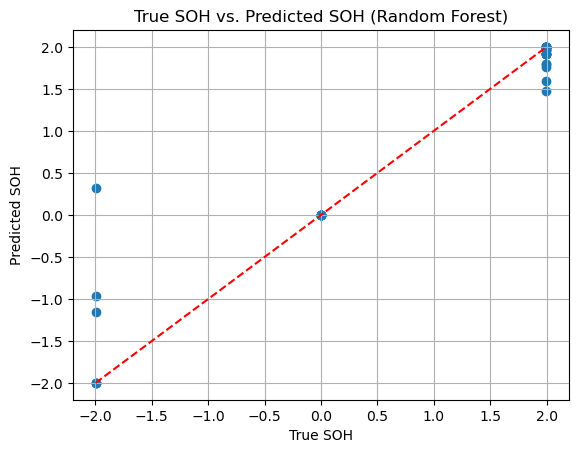

In [12]:
# Plot the true SOH values vs. predicted SOH values
plt.scatter(y_test, soh_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('True SOH')
plt.ylabel('Predicted SOH')
plt.title('True SOH vs. Predicted SOH (Random Forest)')
plt.grid(True)
plt.show()

In [13]:
predictions_df = pd.DataFrame({
    'Actual state of charging': (y_test),# current load other name state of health

    'Predicted state of charging ': (soh_predictions)
})

# Display the DataFrame
print(predictions_df)

    Actual state of charging  Predicted state of charging 
0                     1.9988                      1.998910
1                     1.9990                      1.918976
2                     0.0006                      0.000666
3                     0.0006                      0.000632
4                     0.0006                      0.000612
5                     1.9988                      1.799018
6                    -1.9990                     -1.999006
7                     1.9990                      1.998986
8                     1.9988                      1.998984
9                     1.9990                      1.599204
10                    1.9992                      1.999082
11                    1.9988                      1.479196
12                    0.0006                      0.000624
13                    1.9990                      1.998998
14                    1.9990                      1.999016
15                    1.9988                      1.9988

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
print(y_test)

[ 1.9988e+00  1.9990e+00  6.0000e-04  6.0000e-04  6.0000e-04  1.9988e+00
 -1.9990e+00  1.9990e+00  1.9988e+00  1.9990e+00  1.9992e+00  1.9988e+00
  6.0000e-04  1.9990e+00  1.9990e+00  1.9988e+00  6.0000e-04  1.9990e+00
  1.9990e+00  1.9988e+00  1.9992e+00  1.9988e+00  1.9990e+00  1.9990e+00
  1.9990e+00  1.9990e+00 -1.9992e+00  1.9990e+00  1.9990e+00  1.9990e+00
  1.9990e+00  1.9990e+00 -1.9990e+00  1.9990e+00  1.9990e+00  1.9988e+00
  1.9988e+00  1.9990e+00  1.9992e+00  1.9990e+00  1.9990e+00 -1.9990e+00
  6.0000e-04 -1.9990e+00 -1.9990e+00  6.0000e-04  1.9990e+00  1.9992e+00
  1.9990e+00  1.9990e+00  1.9988e+00]


In [16]:
print(soh_predictions)

[ 1.998910e+00  1.918976e+00  6.660000e-04  6.320000e-04  6.120000e-04
  1.799018e+00 -1.999006e+00  1.998986e+00  1.998984e+00  1.599204e+00
  1.999082e+00  1.479196e+00  6.240000e-04  1.998998e+00  1.999016e+00
  1.998874e+00  6.200000e-04  1.919036e+00  1.999166e+00  1.998954e+00
  1.999090e+00  1.998800e+00  1.919150e+00  1.959020e+00  1.998972e+00
  1.919052e+00 -1.999082e+00  1.998874e+00  1.998962e+00  1.998996e+00
  1.959006e+00  1.999030e+00 -1.159416e+00  1.919050e+00  1.998864e+00
  1.998812e+00  1.998964e+00  1.759134e+00  1.959008e+00  1.999012e+00
  1.998986e+00 -1.999104e+00  6.320000e-04 -9.594780e-01  3.198100e-01
  6.600000e-04  1.799100e+00  1.999156e+00  1.999140e+00  1.998922e+00
  1.998860e+00]


In [17]:
 #Convert predictions and true labels to binary format
# For example, let's assume we're interested in binary classification where 1 is positive and 0 is negative
threshold = 0.5  # You can adjust this threshold based on your problem
y_pred_binary = [1 if pred >= threshold else 0 for pred in soh_predictions]
y_true_binary = [1 if true >= threshold else 0 for true in y_test]

In [18]:
print(y_true_binary)

[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [19]:
print(y_pred_binary)

[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [20]:
conf_matrix = confusion_matrix(y_true_binary,y_pred_binary )

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13  0]
 [ 0 38]]


In [21]:
from sklearn.metrics import f1_score

In [22]:
# Calculate F1 score
f1 = f1_score(y_true_binary, y_pred_binary, average='weighted')
print("F1 Score:", f1)

F1 Score: 1.0


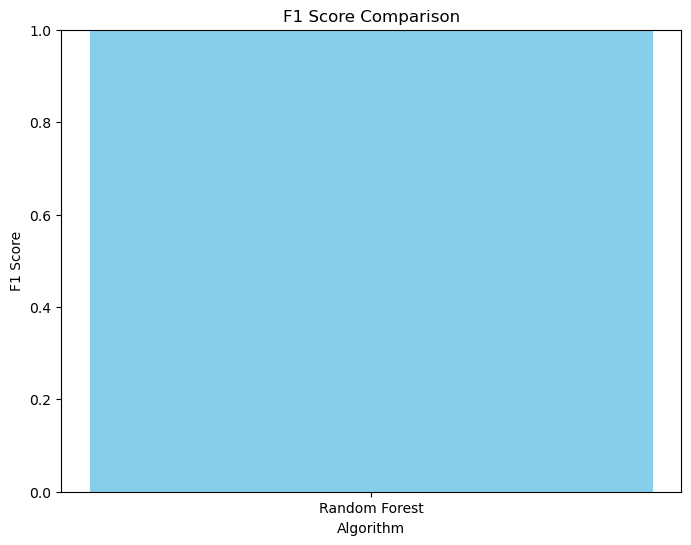

In [23]:
# Plot F1 score
plt.figure(figsize=(8, 6))
plt.bar(["Random Forest"], [f1], color='skyblue')
plt.title("F1 Score Comparison")
plt.xlabel("Algorithm")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()

In [24]:
# Ensure that soc_predictions contain valid class labels and is of the same length as y_test
print("Length of y_test:", len(y_test))
print("Length of soh_predictions:", len(soh_predictions))

Length of y_test: 51
Length of soh_predictions: 51


In [25]:
import seaborn as sns

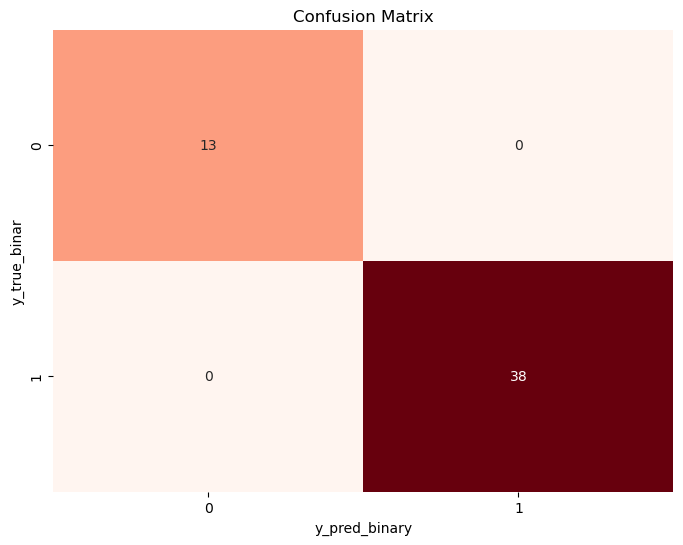

In [26]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("y_pred_binary")
plt.ylabel("y_true_binar")
plt.show()